#1. Data loading and quick look at datas

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import operator

RAND_STATE = 0

# Load dataset
bc = load_breast_cancer()
# For easy of manipulation, convert dataset to pandas dataframe
data= pd.DataFrame(bc.data, columns= bc.feature_names)
# Append dataframe containing tumor features with diagnostic outcomes.
data['Diagnosis'] = bc.target
# Print out the data shape
print(data.shape)
# Display the first five elements of the data (the "head")
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


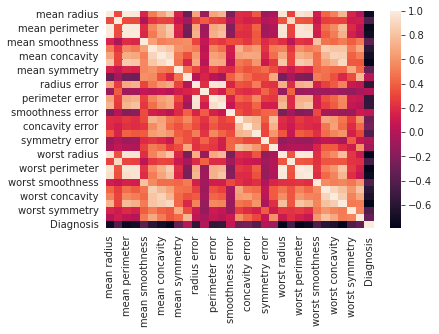

In [ ]:
# Quick visualization of relationships between features

sns.heatmap(data.corr())
sns.set_style("whitegrid")
plt.show()

#2. Data pre-processing

In [ ]:
# Check for null values and remove them (if they exist)
if data.isnull().values.any():
  data.dropna(inplace=True)

# Scale (Normalize) the data
scaler = MinMaxScaler() # x-min / max-min
scaled_data = scaler.fit_transform(data) # Data here become a np array, it's no longer a dataframe

# Print the scaled data shape (It should be the same as before)
print(scaled_data.shape)

(569, 31)


##Split data into training and test sets

In [ ]:
# 1. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['Diagnosis'], train_size = .8 )

# 2. Explore the feature space to understand how many instances (rows) and features (columns) I have
nobj, nfeat = X_train.shape[0], X_train.shape[1]
print(f"Training data is comprised of {nobj} objects and {nfeat} features")
print(f"Testing data is comprised of {X_test.shape[0]} objects and {X_test.shape[1]} features")

Training data is comprised of 455 objects and 30 features
Testing data is comprised of 114 objects and 30 features


#3. Features extraction and reduce features dimension

Use dimensional reduction to reduce our features into principal components (PCA) that maximally explain the data variance.

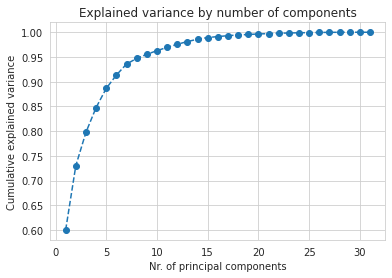

(569, 4)


In [ ]:
# Apply PCA without specifying the number of components to keep, in order to understand how many PCs are sufficient
pca = PCA(random_state=RAND_STATE)
pca.fit(scaled_data)

# Plot the explained variance ratio in a cumulative fashion, in order to visualize the cumulative variance plot
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by number of components')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Nr. of principal components')
plt.show()

# Use the number of components needed to explain more than 80% of the variance in order to create a new PCA object and 
# perform the final dimensionality reduction on the data
pca = PCA(n_components=4, random_state=RAND_STATE)
pca_data = pca.fit_transform(scaled_data)

# Print the data shape after PCA
print(pca_data.shape)

#4. Model testing with result evaluation and analysis
Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN)

##SVM

### Linear Kernel

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[[44  4]
 [ 2 64]]


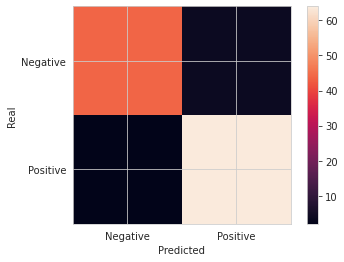

Classifier accuracy: 94.74%
Precision w.r.t class Negative: 0.96
Precision w.r.t class Positive: 0.94
Recall w.r.t class Negative: 0.92
Recall w.r.t class Positive: 0.97


In [ ]:
# Initialise parameters
kernel = 'linear'
max_iteration = 10000

# Initialise the SVM classification model
model = SVC(kernel=kernel, max_iter=max_iteration) 

# Train (fit in Sklearn slang) the model
model.fit(X_train, y_train)

# Classify (make predictions) on the testing set and build the confusion matrix
predicted = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, predicted)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)

accuracy = accuracy_score(y_test, predicted)
precision_negative = precision_score(y_test, predicted, pos_label=0)
precision_positive = precision_score(y_test, predicted, pos_label=1)
recall_negative = recall_score(y_test, predicted, pos_label=0)
recall_positive = recall_score(y_test, predicted, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

### Gaussian Kernel


[[38 10]
 [ 1 65]]


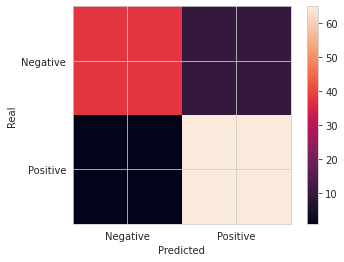

Classifier accuracy: 90.35%
Precision w.r.t class Negative: 0.97
Precision w.r.t class Positive: 0.87
Recall w.r.t class Negative: 0.79
Recall w.r.t class Positive: 0.98


In [ ]:
# Initialise parameters
kernel = 'rbf'
max_iteration = 10000

# Initialise the SVM classification model
model = SVC(kernel=kernel, max_iter=max_iteration) 

# Train (fit in Sklearn slang) the model
model.fit(X_train, y_train)

# Classify (make predictions) on the testing set and build the confusion matrix
predicted = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, predicted)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
accuracy = accuracy_score(y_test, predicted)
precision_negative = precision_score(y_test, predicted, pos_label=0)
precision_positive = precision_score(y_test, predicted, pos_label=1)
recall_negative = recall_score(y_test, predicted, pos_label=0)
recall_positive = recall_score(y_test, predicted, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

## KNN

### K Nearest Neighbours = 3

[[43  4]
 [ 6 61]]


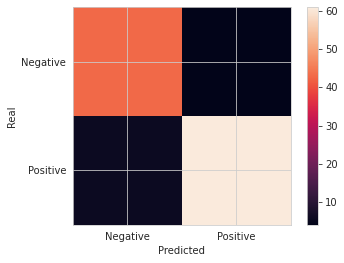

Classifier accuracy: 91.23%
Precision w.r.t class Negative: 0.88
Precision w.r.t class Positive: 0.94
Recall w.r.t class Negative: 0.91
Recall w.r.t class Positive: 0.91


In [ ]:
# model initialization
model = KNeighborsClassifier(n_neighbors = 3)

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, pred)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
accuracy = accuracy_score(y_test, pred)
precision_negative = precision_score(y_test, pred, pos_label=0)
precision_positive = precision_score(y_test, pred, pos_label=1)
recall_negative = recall_score(y_test, pred, pos_label=0)
recall_positive = recall_score(y_test, pred, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

### K Nearest Neighbours = 6

[[44  3]
 [ 4 63]]


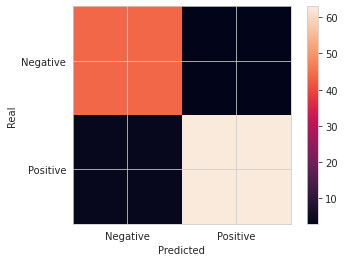

Classifier accuracy: 93.86%
Precision w.r.t class Negative: 0.92
Precision w.r.t class Positive: 0.95
Recall w.r.t class Negative: 0.94
Recall w.r.t class Positive: 0.94


In [ ]:
# model initialization
model = KNeighborsClassifier(n_neighbors = 6)

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, pred)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
accuracy = accuracy_score(y_test, pred)
precision_negative = precision_score(y_test, pred, pos_label=0)
precision_positive = precision_score(y_test, pred, pos_label=1)
recall_negative = recall_score(y_test, pred, pos_label=0)
recall_positive = recall_score(y_test, pred, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

### K Nearest Neighbours = 9

[[44  3]
 [ 1 66]]


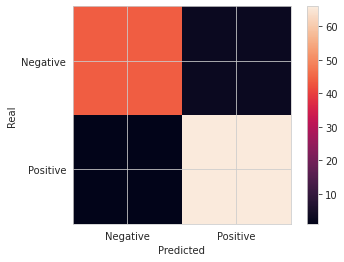

Classifier accuracy: 96.49%
Precision w.r.t class Negative: 0.98
Precision w.r.t class Positive: 0.96
Recall w.r.t class Negative: 0.94
Recall w.r.t class Positive: 0.99


In [ ]:
# model initialization
model = KNeighborsClassifier(n_neighbors = 9)

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, pred)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
accuracy = accuracy_score(y_test, prede)
precision_negative = precision_score(y_test, pred, pos_label=0)
precision_positive = precision_score(y_test, pred, pos_label=1)
recall_negative = recall_score(y_test, prede, pos_label=0)
recall_positive = recall_score(y_test, prede, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

### K Nearest Neighbours = 12

[[44  3]
 [ 1 66]]


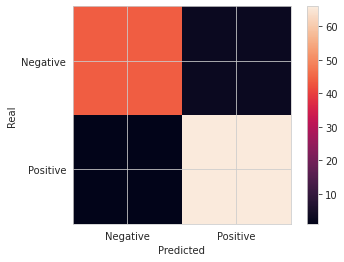

Classifier accuracy: 96.49%
Precision w.r.t class Negative: 0.98
Precision w.r.t class Positive: 0.96
Recall w.r.t class Negative: 0.94
Recall w.r.t class Positive: 0.99


In [ ]:
# model initialization
model = KNeighborsClassifier(n_neighbors = 12)

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# Calculate confusion matrix using sklearn
conf_mat = confusion_matrix(y_test, pred)

# Print and then perform and imshow of the confusion matrix
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Negative","Positive"])
plt.yticks([0,1],["Negative","Positive"])
plt.ylabel("Real")
plt.show()

# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
accuracy = accuracy_score(y_test, prede)
precision_negative = precision_score(y_test, pred, pos_label=0)
precision_positive = precision_score(y_test, pred, pos_label=1)
recall_negative = recall_score(y_test, prede, pos_label=0)
recall_positive = recall_score(y_test, prede, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class Negative: ' + "{0:.2f}".format(precision_negative))
print('Precision w.r.t class Positive: ' + "{0:.2f}".format(precision_positive))
print('Recall w.r.t class Negative: ' + "{0:.2f}".format(recall_negative))
print('Recall w.r.t class Positive: ' + "{0:.2f}".format(recall_positive))

#5. K-means Clustering

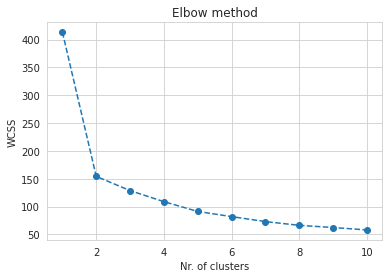

In [ ]:
# Find the optimal number of clusters using the elbow method plotting technique and the WCSS(Intertia) criterion
max_clusters = 10
wcss = []
for i in range (1, max_clusters+1):
  kmeans = KMeans(n_clusters=i, random_state=RAND_STATE)
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Elbow method')
plt.ylabel('WCSS')
plt.xlabel('Nr. of clusters')
plt.show()

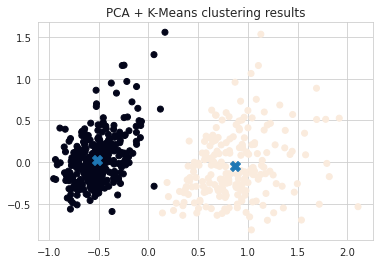

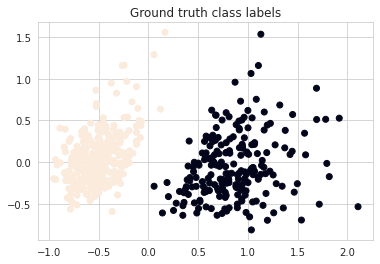

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,12.15,17.92,78.07,462.70,0.09,0.08,0.05,0.03,0.17,0.06,...,23.51,87.00,558.88,0.12,0.18,0.17,0.07,0.27,0.08,1.0
1,17.49,21.62,115.56,980.97,0.10,0.15,0.16,0.09,0.19,0.06,...,29.35,141.64,1426.40,0.14,0.38,0.45,0.18,0.32,0.09,0.0


In [ ]:
# Using the optimal number of clusters found by the Elbow method, create, fit and perform a K-Means clustering on the PCA data
kmeans_pca = KMeans(n_clusters=2, random_state=RAND_STATE)
kmeans_pca.fit(pca_data)

# Get the labels (clusters of each point) and centroids of each cluster and then visualize them using only the first 2 principal components
cluster_labels = kmeans_pca.labels_
cluster_centroids = kmeans_pca.cluster_centers_

# Plot
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_labels)
plt.scatter(cluster_centroids[:,0], cluster_centroids[:, 1], marker='X', s=100)
plt.title('PCA + K-Means clustering results')
plt.show()

# Plot the actual cluster labels to compare our clustering performing with the actual data "division" (of course, the first 2 principal components)
plt.scatter(pca_data[:,0], pca_data[:,1], c=target)
plt.title('Ground truth class labels')
plt.show()

# Add(append) the clustering results to the data Pandas DataFrame (full dataset) and get the mean values of each feature per cluster 
# Hint: group the features by the cluster label
data_kmeans = data.copy(deep=True)
data_kmeans['kmeans_cluster'] = cluster_labels
bc_clusters = data_kmeans.groupby("kmeans_cluster").mean()
bc_clusters.round(2)